In [35]:
import psycopg2
import pandas as pd
import numpy as np
#pd.set_option('display.mpl_style', 'default')
import matplotlib.pyplot as plt
%matplotlib inline  

In [22]:
conn = psycopg2.connect("dbname=taxi-fortaleza user=postgres")

In [23]:
curs = conn.cursor()

In [24]:
curs.execute("SELECT * FROM public.speed_observations_june where avg_speed_ms < 100 order by edge_id_gh")

In [25]:
curs.fetchone()

(982342631, 0, datetime.datetime(2016, 6, 27, 13, 54, 11), 18.021922146101, 1)

In [26]:
x = curs.fetchall()

In [27]:
df = pd.DataFrame(x, columns=['traj', 'edge','date','speed','week_day'])

In [28]:
from sklearn.utils import resample

In [29]:
df.head()

,traj,edge,date,speed,week_day
0,982347328,0,2016-06-27 01:15:51,16.999433,1
1,982342631,0,2016-06-27 13:59:14,18.021922,1
2,982347328,0,2016-06-27 01:15:51,16.999433,1
3,982342631,0,2016-06-27 13:59:14,18.021922,1
4,982347328,0,2016-06-27 01:15:51,16.999433,1


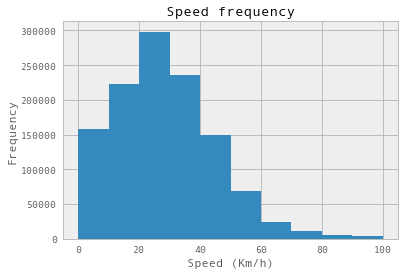

In [36]:
plt.hist(df.speed)
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

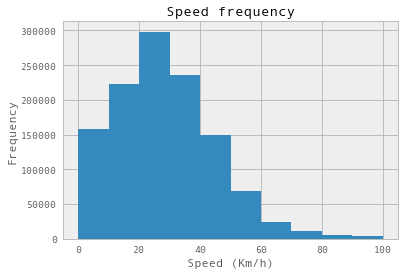

In [38]:
plt.hist(df.speed)
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

In [31]:
ids = df.edge.unique()

In [32]:
df[df['edge']==0]

,traj,edge,date,speed,week_day
0,982347328,0,2016-06-27 01:15:51,16.999433,1
1,982342631,0,2016-06-27 13:59:14,18.021922,1
2,982347328,0,2016-06-27 01:15:51,16.999433,1
3,982342631,0,2016-06-27 13:59:14,18.021922,1
4,982347328,0,2016-06-27 01:15:51,16.999433,1
5,982342631,0,2016-06-27 13:59:14,18.021922,1
6,982347328,0,2016-06-27 01:15:51,16.999433,1
7,982342631,0,2016-06-27 13:59:14,18.021922,1
8,982342631,0,2016-06-28 14:26:09,62.368475,2
9,982342631,0,2016-06-27 13:59:14,18.021922,1


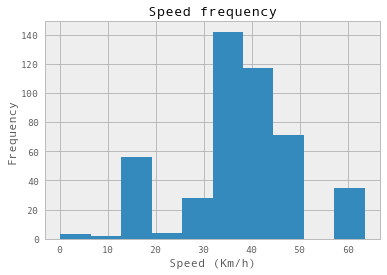

In [39]:
plt.hist(df[df['edge']==1]['speed'])
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

/Users/liviaalmada/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


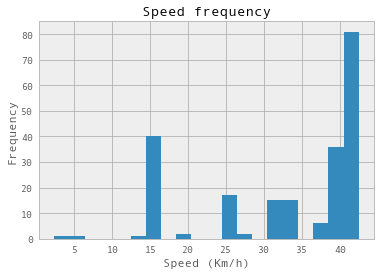

In [41]:
t1 = df[df['date'].dt.hour > 8][df['date'].dt.hour < 16]
plt.hist(t1[t1['edge']==1]['speed'], bins=20)
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

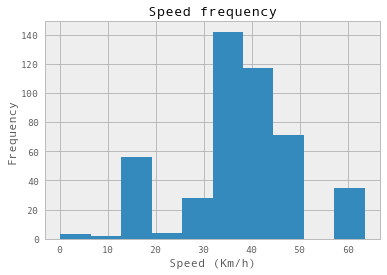

In [42]:
plt.hist(df[df['edge']==1]['speed'])
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

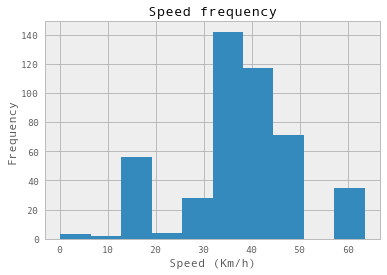

In [43]:
plt.hist(df[df['edge']==1]['speed'])
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

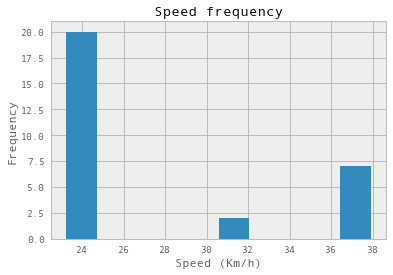

In [17]:
plt.hist(df[df['edge']==693]['speed']) #30 observações
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")